In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91798\Downloads\data_2_var.csv",names=['f1','y'])
df

,f1,y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1106,-115.366669,121.000000
1107,-119.954237,123.609122
1108,-109.942155,127.197394
1109,-111.515368,128.170885


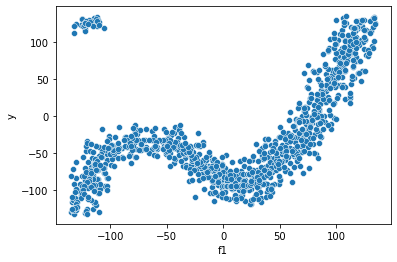

In [3]:
sns.scatterplot(x="f1",y="y",data=df)
plt.show()

# Outlier Removal

In [4]:
outl_lst=df[(df["f1"]<(-100)) & (df["y"]>100)].index
outl_lst

Int64Index([1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082,
            1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093,
            1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104,
            1105, 1106, 1107, 1108, 1109, 1110],
           dtype='int64')

In [5]:
df.drop(index=(outl_lst),inplace=True,axis=0)

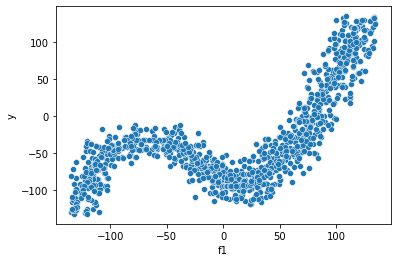

In [6]:
sns.scatterplot(x="f1",y="y",data=df)
plt.show()

C:\Users\91798\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


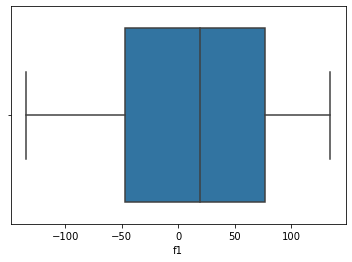

In [7]:
sns.boxplot(df["f1"])
plt.show()

C:\Users\91798\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


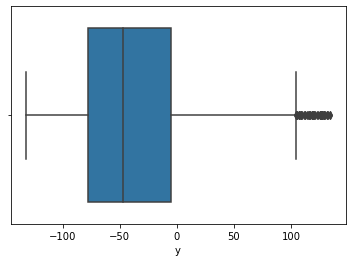

In [8]:
sns.boxplot(df["y"])
plt.show()

In [9]:
df

,f1,y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1067,134.605775,123.619680
1068,116.633331,118.000000
1069,115.862302,118.564590
1070,117.366199,99.544820


In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(df[['f1']])
X_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04,
        -1.84912147e+06],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04,
        -1.79500520e+06],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04,
        -2.45584080e+06],
       ...,
       [ 1.00000000e+00,  1.15862302e+02,  1.34240731e+04,
         1.55534401e+06],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04,
         1.61669883e+06],
       [ 1.00000000e+00,  9.96831410e+01,  9.93672860e+03,
         9.90524318e+05]])

In [11]:
transformed_df = pd.DataFrame(X_poly, columns=['f1_0', 'f1_1', 'f1_2',"f1_3"])

transformed_df['y'] = df['y']

transformed_df.head()

,f1_0,f1_1,f1_2,f1_3,y
0,1.0,-122.740667,15065.271434,-1.849121e+06,-130.572085
1,1.0,-121.531419,14769.885901,-1.795005e+06,-129.938929
2,1.0,-134.917019,18202.602016,-2.455841e+06,-130.141832
3,1.0,-120.605951,14545.795441,-1.754309e+06,-125.760932
4,1.0,-129.894781,16872.654053,-2.191670e+06,-112.785214


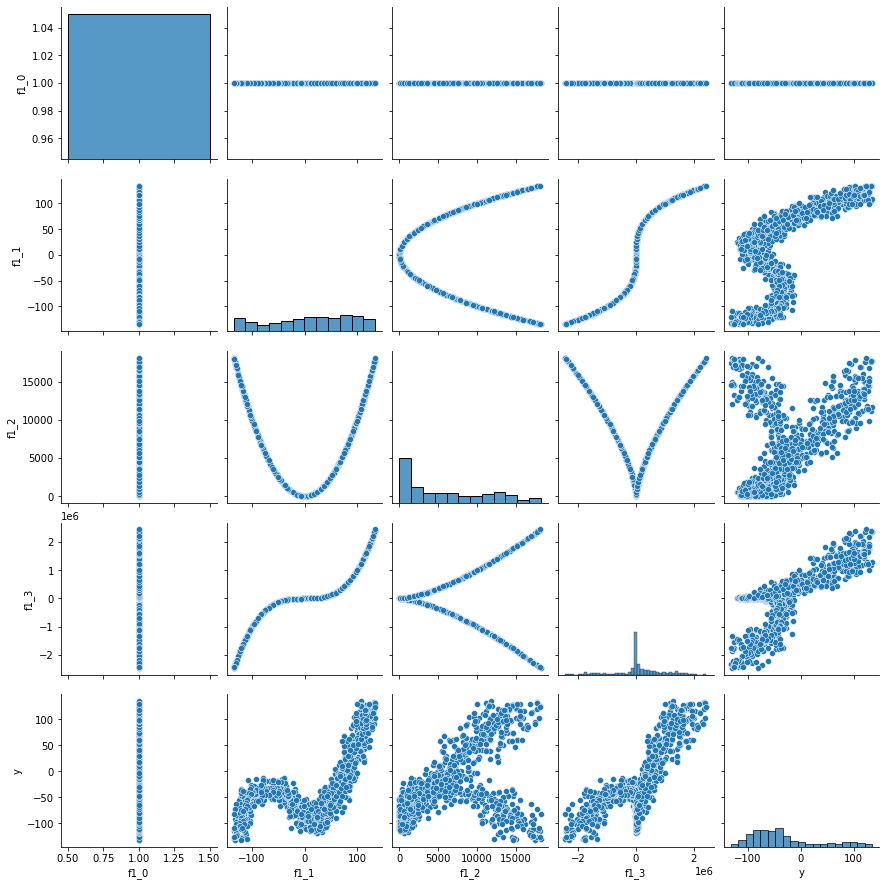

In [12]:
sns.pairplot(transformed_df)
plt.show()

In [13]:
transformed_df

,f1_0,f1_1,f1_2,f1_3,y
0,1.0,-122.740667,15065.271434,-1.849121e+06,-130.572085
1,1.0,-121.531419,14769.885901,-1.795005e+06,-129.938929
2,1.0,-134.917019,18202.602016,-2.455841e+06,-130.141832
3,1.0,-120.605951,14545.795441,-1.754309e+06,-125.760932
4,1.0,-129.894781,16872.654053,-2.191670e+06,-112.785214
...,...,...,...,...,...
1067,1.0,134.605775,18118.714717,2.438884e+06,123.619680
1068,1.0,116.633331,13603.333970,1.586602e+06,118.000000
1069,1.0,115.862302,13424.073071,1.555344e+06,118.564590
1070,1.0,117.366199,13774.824738,1.616699e+06,99.544820


In [14]:
df

,f1,y
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1067,134.605775,123.619680
1068,116.633331,118.000000
1069,115.862302,118.564590
1070,117.366199,99.544820


In [15]:
y=df["y"]

In [16]:
from sklearn.linear_model import LinearRegression
reg_poly = LinearRegression()
reg_poly.fit(transformed_df[['f1_0', 'f1_1', 'f1_2',"f1_3"]],df['y'])

LinearRegression()

In [17]:
print(reg_poly.coef_, reg_poly.intercept_)

[ 0.00000000e+00 -1.88273075e-01  6.09922656e-03  6.92533568e-05] -70.48958670120018


In [18]:
pred_poly = reg_poly.predict(transformed_df[['f1_0', 'f1_1', 'f1_2',"f1_3"]])



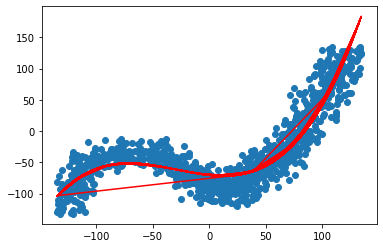

In [19]:
plt.scatter(df['f1'], df['y'])

plt.plot(df['f1'], pred_poly, 'r')

plt.show()

In [20]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y, pred_poly))

print('Mean Squared Error: ', metrics.mean_squared_error(y, pred_poly))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y, pred_poly)))

Mean Absolute Error:  20.222677094216056
Mean Squared Error:  665.3241613372045
Root Mean Squared Error:  25.793878369434957
